<br/>

## **Importing Necessary Modules**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import fbprophet

<br/>

## **Let's take a look which funtionalities Facebook Prophet serves**

In [2]:
dir(fbprophet)

['Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'diagnostics',
 'forecaster',
 'hdays',
 'make_holidays',
 'models',
 'plot']

<br/>

## **Get the dataset**

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [59]:
df = pd.read_csv('drive/My Drive/Datasets/flight.csv', parse_dates = True)

<br/>

## **Have a look at the dataset**

In [60]:
df.head()

,date,flights
0,1/1/2005,594924
1,2/1/2005,545332
2,3/1/2005,617540
3,4/1/2005,594492
4,5/1/2005,614802


In [61]:
df.tail()

,date,flights
31,8/1/2007,653279
32,9/1/2007,600187
33,10/1/2007,629992
34,11/1/2007,605149
35,12/1/2007,614139


<br/>

## **Shape**

In [62]:
df.shape

(36, 2)

<br/>

## **Checking Null values**

In [63]:
df.isnull().sum()

date       0
flights    0
dtype: int64

<br/>

## **Checking the data types**

In [64]:
df.dtypes

date       object
flights     int64
dtype: object

<br/>

## **Change the data type**

In [66]:
df['date'] = pd.to_datetime(df['date'])

In [67]:
df.head()

,date,flights
0,2005-01-01,594924
1,2005-02-01,545332
2,2005-03-01,617540
3,2005-04-01,594492
4,2005-05-01,614802


<br/>

## **Plotting the 'flight' feature**

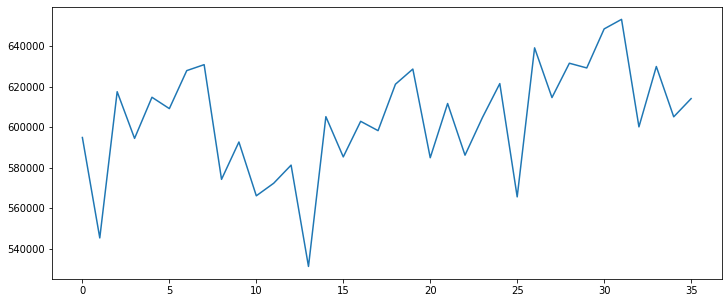

In [68]:
plt.figure(figsize = (12, 5))

plt.plot(df['flights'])
plt.show()

**Note:**  
From the plot, it's seen that the data isn't stationary. We should make it stationary first to work.

<br/>

## **Let's make it stationary then**

In [69]:
df['flights'] = df['flights'] - df['flights'].shift(1)

<br/>

## **Plotting**

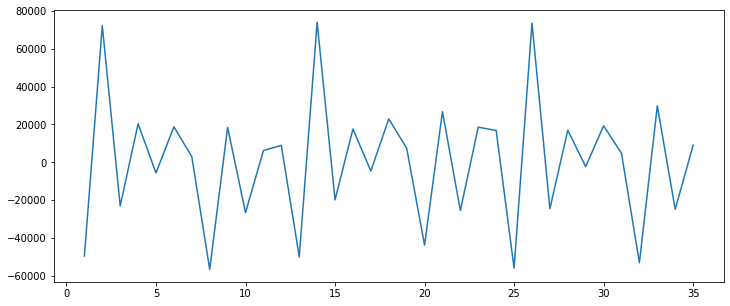

In [70]:
plt.figure(figsize = (12, 5))

plt.plot(df['flights'])
plt.show()

**Note:**  
Now it looks like **Stationary**.

<br/>

## **Renaming the column names**
**Note:**  
To use **Facebook Prophet**, We will have to rename the column names into **ds** and **y**.

In [71]:
df = df.rename(columns={'date' : 'ds', 'flights' : 'y'})
df.head(3)

,ds,y
0,2005-01-01,NaN
1,2005-02-01,-49592.0
2,2005-03-01,72208.0


<br/>

## **Remove the 1st row**
**Note:**  
After **differencing** to make the dataset **stationary**, we got a **Nan** value in the first row. We will have to **remove** it to start the operation.

In [72]:
df = df[1:]

df.head()

,ds,y
1,2005-02-01,-49592.0
2,2005-03-01,72208.0
3,2005-04-01,-23048.0
4,2005-05-01,20310.0
5,2005-06-01,-5607.0


<br/>

## **Import the Prophet Class**

In [73]:
from fbprophet import Prophet

<br/>

## **Let's take a look which funtionalities Prophet class serves**

In [74]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

<br/>

## **Initialize the Model**

In [75]:
model = Prophet()

<br/>

## **Train the Model**

In [76]:
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<br/>

## **Creating future dates for Predictions**

In [77]:
future_dates = model.make_future_dataframe(periods = 365)

**Note:**  
So what this **make_future_dataframe** does? In this case, it added 365 days after the dates **df** already have.  
Let's check out the shape of both.

In [78]:
print(df.shape)
print(future_dates.shape)

(35, 2)
(400, 1)


In [79]:
future_dates.head()

,ds
0,2005-02-01
1,2005-03-01
2,2005-04-01
3,2005-05-01
4,2005-06-01


<br/>

## **Prediction**

In [80]:
pred = model.predict(future_dates)

In [81]:
pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-02-01,-2571.714150,-52530.467455,-46363.333487,-2571.714150,-2571.714150,-46882.135892,-46882.135892,-46882.135892,-46882.135892,-46882.135892,-46882.135892,0.0,0.0,0.0,-49453.850042
1,2005-03-01,-2445.189984,67318.585933,74001.848919,-2445.189984,-2445.189984,73145.012893,73145.012893,73145.012893,73145.012893,73145.012893,73145.012893,0.0,0.0,0.0,70699.822909
2,2005-04-01,-2305.109659,-27439.298079,-20745.583476,-2305.109659,-2305.109659,-21686.914067,-21686.914067,-21686.914067,-21686.914067,-21686.914067,-21686.914067,0.0,0.0,0.0,-23992.023726
3,2005-05-01,-2169.548053,14709.830761,21161.729271,-2169.548053,-2169.548053,19993.464270,19993.464270,19993.464270,19993.464270,19993.464270,19993.464270,0.0,0.0,0.0,17823.916217
4,2005-06-01,-2029.467725,-10702.275884,-3944.932763,-2029.467725,-2029.467725,-5302.735920,-5302.735920,-5302.735920,-5302.735920,-5302.735920,-5302.735920,0.0,0.0,0.0,-7332.203646


**Note:**  
**yhat** : the predicted forecast  
**yhat_lower** : the lower border of the prediction  
**yhat_upper** : the upper border of the prediction

<br/>

## **Let's plot the Prediction**

<Figure size 864x360 with 0 Axes>

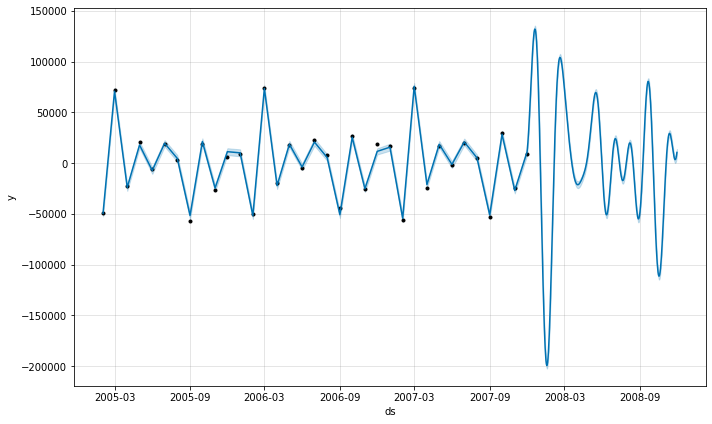

In [82]:
plt.figure(figsize = (12, 5))

model.plot(pred)
plt.show()

**Note:**  
**Black dots** = Actual values  
**Deep Blue Line** = Predicted values

<br/>

## **Plotting each components**

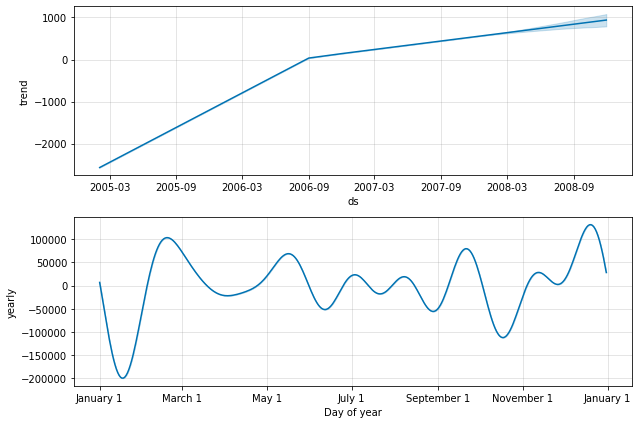

In [85]:
model.plot_components(pred)

plt.show()

<br/>

## **Cross-Validation**

In [86]:
from fbprophet.diagnostics import cross_validation

cv = cross_validation(model, initial = '35 days', period = '180 days', horizon = '365 days')

INFO:fbprophet:Making 4 forecasts with cutoffs between 2005-06-09 00:00:00 and 2006-12-01 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 12.
INFO:fbprophet:n_changepoints greater than number of observations. Using 17.


In [87]:
cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2005-07-01,132382.788801,132382.788705,132382.788928,18766.0,2005-06-09
1,2005-08-01,-319924.148158,-319924.148514,-319924.147721,2943.0,2005-06-09
2,2005-09-01,109440.248487,109440.247770,109440.249387,-56651.0,2005-06-09
3,2005-10-01,300035.317030,300035.315856,300035.318411,18459.0,2005-06-09
4,2005-11-01,98862.531051,98862.529266,98862.532975,-26574.0,2005-06-09


<br/>

## **Performance Metrics**

In [89]:
from fbprophet.diagnostics import performance_metrics

pm = performance_metrics(cv)
pm

,horizon,mse,rmse,mae,mape,mdape,coverage
0,31 days,5.164322e+09,71863.213878,56431.774454,4.254110,3.406143,0.00
1,53 days,2.799793e+10,167325.809947,108744.364293,30.167214,5.191032,0.00
2,57 days,2.639988e+10,162480.392544,95198.623099,27.920522,0.697647,0.00
3,58 days,2.644925e+10,162632.261740,96711.029403,28.421493,1.670879,0.00
4,62 days,2.652185e+10,162855.292857,98845.786752,28.327063,1.610636,0.00
5,84 days,7.357623e+09,85776.589333,59651.811834,1.633318,1.610636,0.00
6,85 days,7.147790e+09,84544.605946,55013.322449,1.519059,1.482019,0.00
7,89 days,7.065982e+09,84059.394388,51892.254821,0.912273,0.280268,0.00
8,90 days,7.150048e+09,84557.957006,53595.465787,0.912622,0.280966,0.00
9,114 days,2.007478e+10,141685.489607,82466.732922,3.993201,0.280966,0.00


<br/>

## **Visualize the Performance Metrics**

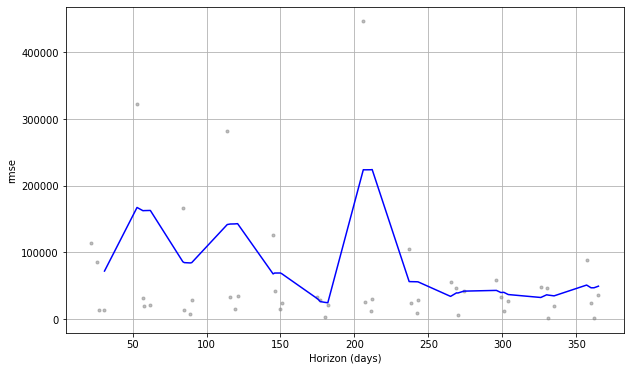

In [92]:
from fbprophet.plot import plot_cross_validation_metric

plot_cross_validation_metric(cv, metric='rmse')
plt.show()